In [273]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [316]:
data = pd.read_csv('seasons_stats.csv')

data.head()

Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

     TS%  3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  blanl  \
0  0.368   NaN  0.467   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
1  0.435   NaN  0.387   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2  0.394   NaN  0.259   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
3  0.312   NaN  0.395   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4  0.308   NaN  0.378   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   

   OWS  DWS   WS  WS/48  blank2  OBPM  DBPM  BPM  VORP     FG    FGA    FG%  \
0 -0.1  3.6  3.5    NaN     NaN   NaN   NaN  NaN   NaN  144.0  516.0  0.279   
1  1.6  0.6  2.2    NaN     NaN   NaN   NaN  NaN   NaN  102.0  274.0  0.372   
2  0.9  2.8  3.6    NaN     NaN   NaN   NaN  NaN   NaN  174.0  499.0  0.349   
3 -0.5 -0.1 -0.6    NaN     NaN   NaN   NaN  NaN   NaN   22.0   86.0  0.256   
4 -0.5 -0.1 -0.6    NaN     NaN   NaN   NaN  NaN   NaN   21.0   82.0  0.256   

   3P  3PA  3P%     2P    2PA    2P%   eFG%     FT    FTA    FT%  ORB  DRB  \
0 NaN  NaN  NaN  144.0  516.0  0.279  0.279  170.0  241.0  0.705  NaN  NaN   
1 NaN  NaN  NaN  102.0  274.0  0.372  0.372   75.0  106.0  0.708  NaN  NaN   
2 NaN  NaN  NaN  174.0  499.0  0.349  0.349   90.0  129.0  0.698  NaN  NaN   
3 NaN  NaN  NaN   22.0   86.0  0.256  0.256   19.0   34.0  0.559  NaN  NaN   
4 NaN  NaN  NaN   21.0   82.0  0.256  0.256   17.0   31.0  0.548  NaN  NaN   

   TRB    AST  STL  BLK  TOV     PF    PTS  
0  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  NaN   20.0  NaN  NaN  NaN   27.0   59.0

In [317]:
#Only run this once
data.drop(['Unnamed: 0', 'blanl', 'blank2'],axis = 1, inplace = True)
data.dropna(inplace = True)

In [353]:
data

Year                Player    Pos   Age   Tm     G    GS      MP  \
5730   1980.0       Tiny Archibald*     PG  31.0  BOS  80.0  80.0  2864.0   
5748   1980.0           Larry Bird*     PF  23.0  BOS  82.0  82.0  2955.0   
5781   1980.0             M.L. Carr     SF  29.0  BOS  82.0   7.0  1994.0   
5786   1980.0            Don Chaney     SG  33.0  BOS  60.0   0.0   523.0   
5802   1980.0          Dave Cowens*      C  31.0  BOS  66.0  55.0  2159.0   
5835   1980.0            Chris Ford     SG  31.0  BOS  73.0  73.0  2115.0   
5867   1980.0      Gerald Henderson     PG  24.0  BOS  76.0   2.0  1061.0   
5901   1980.0          Jeff Judkins     SF  23.0  BOS  65.0   0.0   674.0   
5947   1980.0        Pete Maravich*     SG  32.0  TOT  43.0   4.0   964.0   
5949   1980.0        Pete Maravich*     SG  32.0  BOS  26.0   4.0   442.0   
6004   1980.0            Rick Robey      C  24.0  BOS  82.0  27.0  1918.0   
6091   1981.0       Tiny Archibald*     PG  32.0  BOS  80.0  72.0  2820.0   
6100   1981.0           Larry Bird*     PF  24.0  BOS  82.0  82.0  3239.0   
6128   1981.0             M.L. Carr     SF  30.0  BOS  41.0   7.0   655.0   
6169   1981.0          Terry Duerod  SG-SF  24.0  TOT  50.0   0.0   451.0   
6171   1981.0          Terry Duerod     SG  24.0  BOS  32.0   0.0   114.0   
6182   1981.0            Chris Ford     SG  32.0  BOS  82.0  75.0  2723.0   
6217   1981.0      Gerald Henderson     PG  25.0  BOS  82.0  10.0  1608.0   
6274   1981.0         Wayne Kreklow     SG  24.0  BOS  25.0   0.0   100.0   
6302   1981.0        Cedric Maxwell     SF  25.0  BOS  81.0  81.0  2730.0   
6312   1981.0         Kevin McHale*     PF  23.0  BOS  82.0   1.0  1645.0   
6343   1981.0        Robert Parish*      C  27.0  BOS  82.0  78.0  2298.0   
6366   1981.0            Rick Robey      C  25.0  BOS  82.0   4.0  1569.0   
6449   1982.0  Kareem Abdul-Jabbar*      C  34.0  LAL  76.0  76.0  2677.0   
6450   1982.0           Alvan Adams      C  27.0  PHO  79.0  75.0  2393.0   
6451   1982.0          Mark Aguirre     SF  22.0  DAL  51.0  20.0  1468.0   
6452   1982.0           Danny Ainge     SG  22.0  BOS  53.0   1.0   564.0   
6453   1982.0       Tiny Archibald*     PG  33.0  BOS  68.0  51.0  2167.0   
6459   1982.0          Greg Ballard     SF  27.0  WSB  79.0  79.0  2946.0   
6460   1982.0            Gene Banks     SF  22.0  SAS  80.0   4.0  1700.0   
...       ...                   ...    ...   ...  ...   ...   ...     ...   
24660  2017.0         Alan Williams      C  24.0  PHO  47.0   0.0   708.0   
24661  2017.0        Deron Williams     PG  32.0  TOT  64.0  44.0  1657.0   
24662  2017.0        Deron Williams     PG  32.0  DAL  40.0  40.0  1171.0   
24663  2017.0        Deron Williams     PG  32.0  CLE  24.0   4.0   486.0   
24664  2017.0      Derrick Williams     PF  25.0  TOT  50.0  11.0   804.0   
24665  2017.0      Derrick Williams     PF  25.0  MIA  25.0  11.0   377.0   
24666  2017.0      Derrick Williams     PF  25.0  CLE  25.0   0.0   427.0   
24667  2017.0          Lou Williams     SG  30.0  TOT  81.0   1.0  1994.0   
24668  2017.0          Lou Williams     SG  30.0  LAL  58.0   1.0  1403.0   
24669  2017.0          Lou Williams     SG  30.0  HOU  23.0   0.0   591.0   
24670  2017.0       Marvin Williams     PF  30.0  CHO  76.0  76.0  2295.0   
24671  2017.0       Reggie Williams     SF  30.0  NOP   6.0   0.0    79.0   
24672  2017.0         Troy Williams     SF  22.0  TOT  30.0  16.0   557.0   
24673  2017.0         Troy Williams     SF  22.0  MEM  24.0  13.0   418.0   
24674  2017.0         Troy Williams     SF  22.0  HOU   6.0   3.0   139.0   
24675  2017.0          Kyle Wiltjer     PF  24.0  HOU  14.0   0.0    44.0   
24676  2017.0       Justise Winslow     SF  20.0  MIA  18.0  15.0   625.0   
24677  2017.0           Jeff Withey      C  26.0  UTA  51.0   1.0   432.0   
24678  2017.0        Christian Wood     PF  21.0  CHO  13.0   0.0   107.0   
24679  2017.0           Metta World     SF  37.0  LAL  25.0   2.0   160.0   
24680

In [355]:
data.groupby('Player').mean()

Year        Age          G         GS  \
Player                                                              
A.C. Green           1993.888889  29.888889  75.611111  50.277778   
A.J. English         1991.500000  23.500000  75.500000   9.000000   
A.J. Guyton          2001.500000  22.500000  39.000000   7.000000   
A.J. Hammons         2017.000000  24.000000  22.000000   0.000000   
A.J. Price           2013.125000  26.125000  35.250000   3.125000   
A.J. Wynder          1991.000000  26.000000   6.000000   0.000000   
Aaron Brooks         2012.571429  27.571429  56.428571  16.142857   
Aaron Gordon         2016.000000  20.000000  68.333333  39.000000   
Aaron Gray           2011.250000  26.250000  46.750000   7.750000   
Aaron Harrison       2016.500000  21.500000  13.000000   0.000000   
Aaron McKie          1999.750000  26.750000  59.187500  20.625000   
Aaron Williams       2000.272727  28.272727  56.454545   5.909091   
Acie Earl            1996.000000  25.000000  50.250000   3.750000   
Acie Law             2010.000000  25.000000  29.444444   1.000000   
Adam Harrington      2003.000000  22.000000  12.666667   0.000000   
Adam Keefe           1997.666667  26.666667  66.500000   3.666667   
Adam Morrison        2008.800000  23.800000  42.600000   6.600000   
Adonal Foyle         2000.500000  24.500000  68.500000   0.500000   
Adonis Jordan        1999.000000  28.000000   4.000000   0.000000   
Adonis Thomas        2014.000000  20.000000   5.000000   0.500000   
Adreian Payne        2015.600000  23.600000  26.800000   9.200000   
Adrian Branch        1988.500000  24.500000  32.500000   1.750000   
Adrian Caldwell      1995.000000  28.000000  35.000000   0.000000   
Adrian Dantley*      1987.333333  30.333333  60.555556  55.888889   
Adrian Griffin       2003.500000  28.500000  55.250000  22.125000   
Al Harrington        2006.800000  25.800000  56.600000  28.950000   
Al Horford           2012.500000  25.500000  64.600000  64.200000   
Al Jefferson         2010.545455  25.545455  68.181818  50.000000   
Al Thornton          2010.000000  26.000000  55.250000  29.500000   
Al Wood              1983.875000  24.875000  58.125000  31.375000   
...                          ...        ...        ...        ...   
Willie Cauley-Stein  2016.500000  22.500000  70.500000  30.000000   
Willie Green         2009.500000  27.500000  60.916667  24.750000   
Willie Reed          2017.000000  26.000000  71.000000   5.000000   
Willie Warren        2011.000000  21.000000  19.000000   0.000000   
Willie White         1985.500000  22.500000  41.000000   2.000000   
Willy Hernangomez    2017.000000  22.000000  72.000000  22.000000   
Wilson Chandler      2011.909091  23.909091  53.454545  38.636364   
Winston Bennett      1992.000000  26.000000  53.000000  45.000000   
Winston Garland      1990.888889  25.888889  65.555556  37.111111   
World B.             1984.555556  30.555556  58.111111  46.000000   
Xavier Henry         2012.500000  20.500000  44.000000   5.750000   
Xavier McDaniel      1991.076923  27.076923  71.615385  46.769231   
Xavier Munford       2016.000000  23.000000  14.000000   0.000000   
Xavier Silas         2012.000000  24.000000   2.000000   0.000000   
Yakhouba Diawara     2008.000000  25.000000  60.333333  18.000000   
Yao Ming*            2006.166667  25.166667  66.833333  65.166667   
Yaroslav Korolev     2006.500000  18.500000  17.000000   0.000000   
Yi Jianlian          2010.000000  22.000000  54.400000  32.600000   
Yogi Ferrell         2017.000000  23.000000  30.666667  19.333333   
Yuta Tabuse          2005.000000  24.000000   4.000000   0.000000   
Zabian Dowdell       2011.000000  26.000000  24.000000   0.000000   
Zach LaVine          2016.000000  20.000000  68.666667  40.000000   
Zach Randolph        2009.882353  27.882353  62.705882  51.176471   
Zan Tabak            1996.750000  25.750000  50.000000  20.250000   
Zarko Cabarkapa      2005.000000  23.000000  46.750000   1.000000   
Zarko Paspalj        1990.

In [352]:
df = data.set_index(["Year", "Player"]) # index
df = df.iloc[:,df.columns == 'PER']
df
#df = df['PER'].unstack().shift(+1) # pull out the groups, shift with lag step=1
#df = df.stack(dropna=False);df

PER
Year   Player                    
1980.0 Tiny Archibald*       15.3
       Larry Bird*           20.5
       M.L. Carr             14.6
       Don Chaney             7.8
       Dave Cowens*          14.8
       Chris Ford            13.0
       Gerald Henderson      12.7
       Jeff Judkins          14.1
       Pete Maravich*        13.8
       Pete Maravich*        15.6
       Rick Robey            15.4
1981.0 Tiny Archibald*       14.3
       Larry Bird*           19.9
       M.L. Carr             11.6
       Terry Duerod          13.8
       Terry Duerod          14.3
       Chris Ford             8.8
       Gerald Henderson      10.4
       Wayne Kreklow         -1.9
       Cedric Maxwell        17.6
       Kevin McHale*         16.4
       Robert Parish*        25.2
       Rick Robey            14.9
1982.0 Kareem Abdul-Jabbar*  23.4
       Alvan Adams           18.6
       Mark Aguirre          17.3
       Danny Ainge           10.1
       Tiny Archibald*       14.3
       Greg Ballard          17.9
       Gene Banks            14.7
...                           ...
2017.0 Alan Williams         19.5
       Deron Williams        14.0
       Deron Williams        15.0
       Deron Williams        11.4
       Derrick Williams      10.6
       Derrick Williams      10.1
       Derrick Williams      11.1
       Lou Williams          21.4
       Lou Williams          23.9
       Lou Williams          15.4
       Marvin Williams       13.7
       Reggie Williams       11.7
       Troy Williams          8.9
       Troy Williams          7.6
       Troy Williams         12.8
       Kyle Wiltjer           6.7
       Justise Winslow        8.2
       Jeff Withey           18.8
       Christian Wood        15.1
       Metta World            6.2
       Brandan Wright        18.5
       Delon Wright          15.0
       James Young           10.0
       Joe Young             11.4
       Nick Young            14.1
       Thaddeus Young        14.9
       Cody Zeller           16.7
       Tyler Zeller          13.0
       Paul Zipser            6.9
       Ivica Zubac           17.0

[14585 rows x 1 columns]

In [293]:
dftest = data.set_index(["season", "player"]) # index
dftest = dftest.iloc[:,dftest.columns == 'per']
dftest

per
season  player                         
2002-03 Tracy McGrady             31.01
        Shaquille O'Neal          29.43
        Kobe Bryant               27.07
        Kevin Garnett             26.46
        Tim Duncan                26.46
        Dirk Nowitzki             25.94
        Steve Nash                23.51
        Paul Pierce               23.49
        Sam Cassell               23.08
        Jason Kidd                22.62
        Vince Carter              22.48
        Ray Allen                 22.19
        Allen Iverson             22.14
        Gary Payton               21.94
        Karl Malone               21.71
        Chris Webber              21.48
        Michael Redd              21.33
        Jermaine O'Neal           21.16
        Steve Francis             21.12
        Chauncey Billups          21.10
        Elton Brand               21.09
        Shawn Marion              21.05
        Stephon Marbury           21.03
        Grant Hill                21.02
        John Stockton             20.68
        Pau Gasol                 20.66
        Yao Ming                  20.20
        Michael Jordan            20.14
        Shareef Abdur-Rahim       20.09
        Peja Stojakovic           20.04
...                                 ...
2019-20 Darius Garland             8.57
        Wayne Ellington            8.52
        Hamidou Diallo             8.47
        Rodions Kurucs             8.43
        Dzanan Musa                8.41
        Kevin Knox II              8.40
        Wesley Matthews            8.39
        Darius Bazley              8.17
        Matthew Dellavedova        8.16
        Tyler Johnson              8.13
        Grant Williams             8.06
        Frank Jackson              7.74
        Kenrich Williams           7.66
        Semi Ojeleye               7.64
        Nickeil Alexander-Walker   7.62
        Vince Carter               7.60
        Dennis Smith Jr.           7.51
        Wilson Chandler            7.45
        Patrick McCaw              7.35
        Luguentz Dort              7.34
        Jordan Poole               7.28
        Anthony Tolliver           6.66
        Treveon Graham             6.63
        Rodney McGruder            6.56
        Sekou Doumbouya            6.29
        Dwayne Bacon               6.15
        Jerome Robinson            6.04
        Allen Crabbe               6.00
        Jacob Evans                5.55
        Terrance Ferguson          4.15

[6119 rows x 1 columns]

In [278]:
data.set_index(['season','player'], inplace = True)
m_data = pd.concat([data, df],axis = 1)
m_data.dropna(inplace = True)

In [279]:
X = pd.DataFrame(m_data.loc[:,m_data.columns != 'per'])
Y = pd.DataFrame(m_data.loc[:,m_data.columns == 'per'])

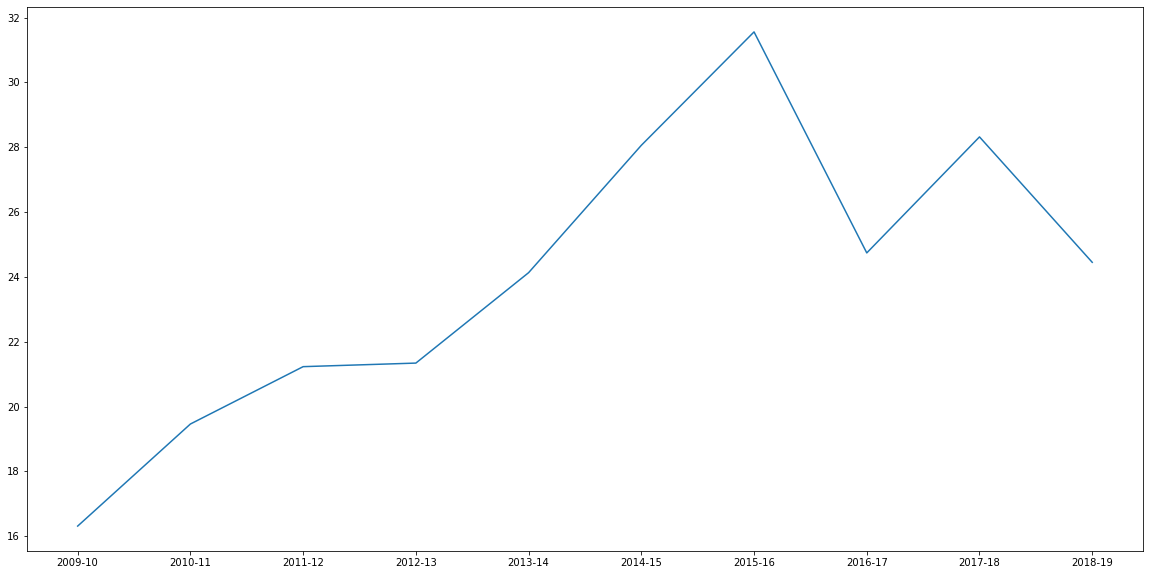

In [280]:
plt.figure(figsize=(20,10))
plt.plot(k_data['season'],k_data['per'])

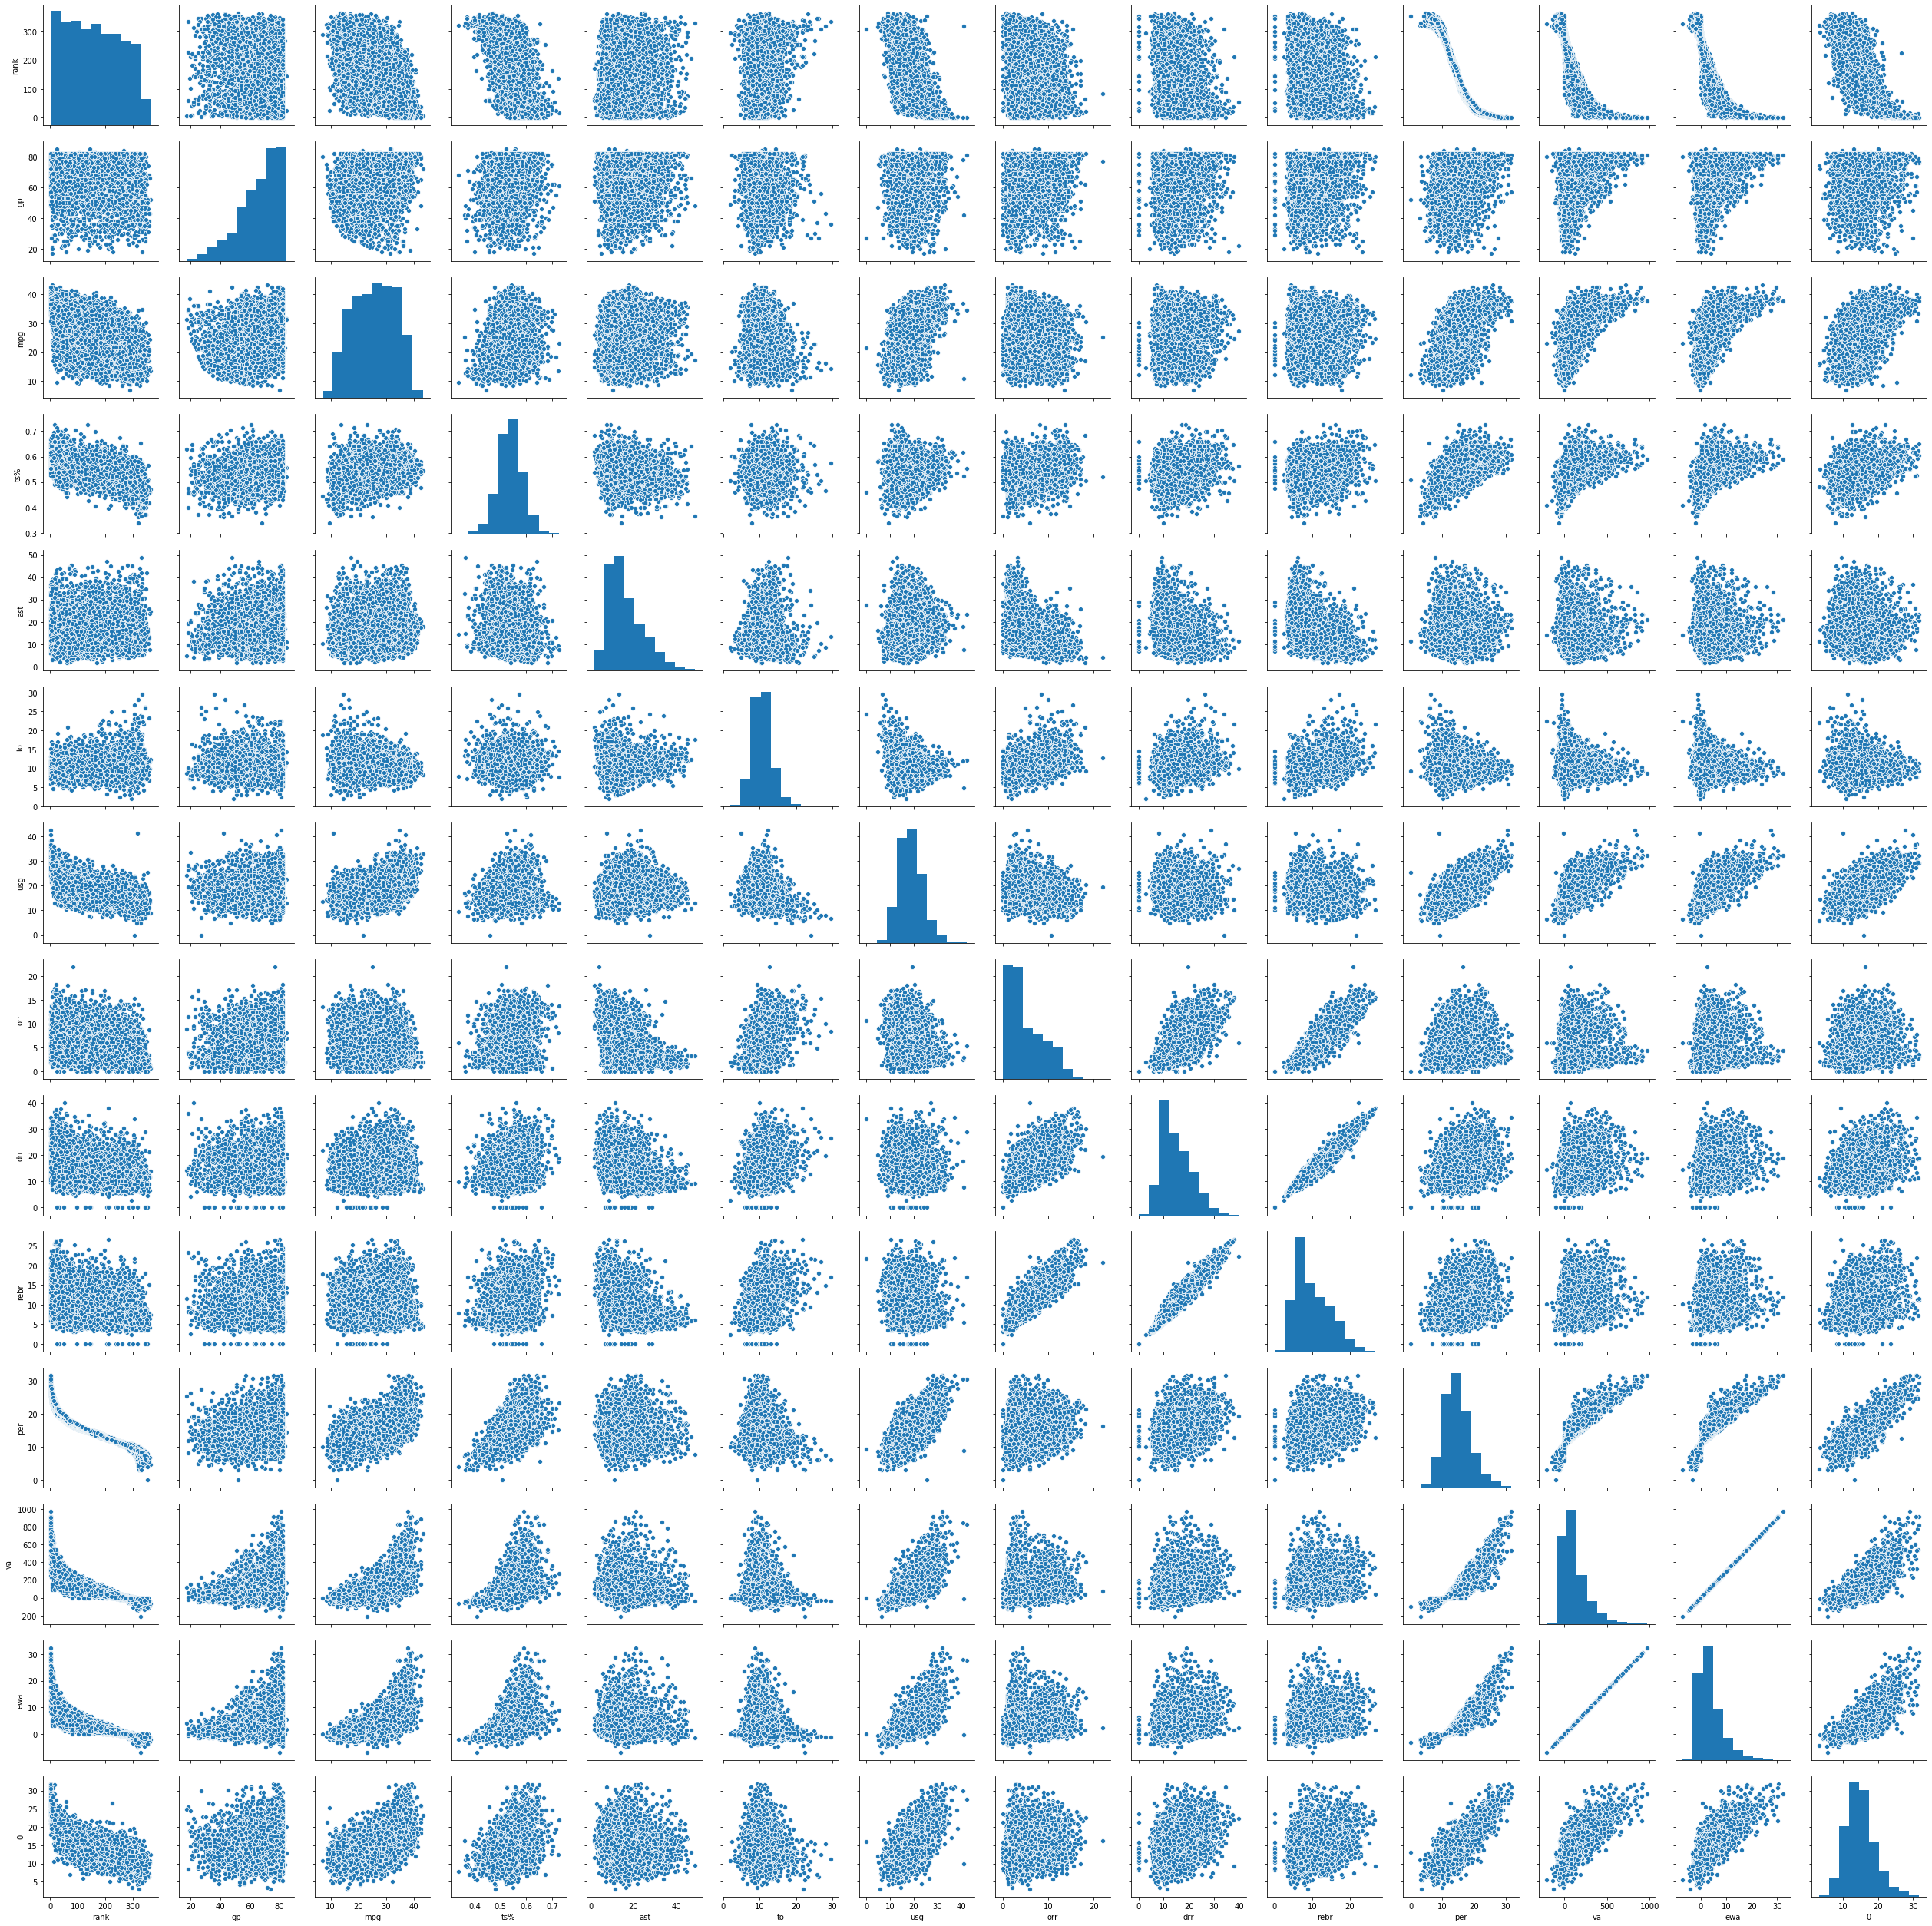

In [281]:
sns.pairplot(m_data)

In [285]:
X = pd.DataFrame(m_data.loc[:,m_data.columns != 'per'])
Y = pd.DataFrame(m_data.loc[:,m_data.columns == 'per'])
X.drop(columns = 'team',inplace = True)

In [255]:
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:
print(lr.coef_)

c = pd.DataFrame(lr.coef_,columns = X.columns)

[[-1.95512456e-02 -1.11888074e-02 -1.98801717e-02  1.17245519e+01
   3.99584403e-02 -1.04371152e-01  1.48518246e-01 -5.44048207e-02
  -1.55985837e-01  3.78644250e-01  2.85491041e-02 -5.77366384e-01
   7.00197154e-02]]


In [304]:
lr.predict(X,Y)

TypeError: predict() takes 2 positional arguments but 3 were given